In [1]:
# Install requirements libraries
!pip install -r ./requirements.txt

Defaulting to user installation because normal site-packages is not writeable


In [2]:
from Sokoban_env import Sokoban_v2
from rl_algorithms import Q_learning, sarsa, first_visit_monte_carlo
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

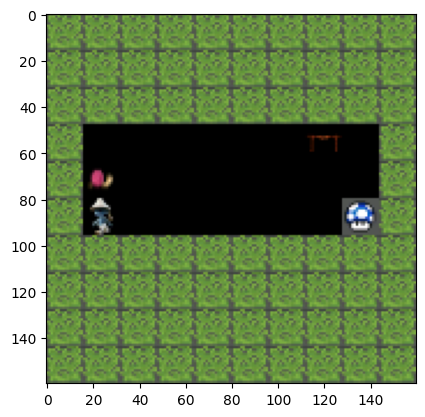

In [3]:
env = Sokoban_v2(map_name="special_1")
env_2 = Sokoban_v2(map_name="special_2")
env_3 = Sokoban_v2(map_name="special_3")
env_3.reset()
plt.imshow(env_3.render())

In [4]:
def training(algorithm, env, epsilon, episodes):
    def setup(algorithm, env, epsilon, episodes):
        q_table, rewards = algorithm(env, epsilon=epsilon, num_episodes=episodes)
        return q_table, rewards
    def eva_cal(rewards, episodes):
        return sum(rewards)/episodes
    
    q_table, rewards = setup(algorithm, env, epsilon, episodes)
    eva = eva_cal(rewards, episodes)

    return q_table, eva

In [5]:
def multiple_episodes(algorithms, env, epsilon, episode):
    eva = []
    for i in episode:
        print(f'Algorithms: {algorithms.__name__} in episode: {i}')
        q_table, eva_i = training(algorithms, env, epsilon, i)
        eva.append(eva_i)
    return q_table, eva, episode

In [12]:
q_table_SARSA, eva_SARSA, episodes_1 = multiple_episodes(sarsa, env_2, 0.1, [500, 1000, 2000, 5000, 10000, 20000])
q_table_Monte, eva_Monte, episodes_2 = multiple_episodes(first_visit_monte_carlo, env_2, 0.65, [500])
q_table_QL, eva_QL, episodes_3 = multiple_episodes(Q_learning, env_2, 0.6, [500])

Algorithms: sarsa in episode: 500
---- Episode: 0
Algorithms: sarsa in episode: 1000
---- Episode: 0
---- Episode: 500
Algorithms: sarsa in episode: 2000
---- Episode: 0
---- Episode: 500
---- Episode: 1000
---- Episode: 1500
Algorithms: sarsa in episode: 5000
---- Episode: 0
---- Episode: 500
---- Episode: 1000
---- Episode: 1500
---- Episode: 2000
---- Episode: 2500
---- Episode: 3000
---- Episode: 3500
---- Episode: 4000
---- Episode: 4500
Algorithms: sarsa in episode: 10000
---- Episode: 0
---- Episode: 500
---- Episode: 1000
---- Episode: 1500
---- Episode: 2000
---- Episode: 2500
---- Episode: 3000
---- Episode: 3500
---- Episode: 4000
---- Episode: 4500
---- Episode: 5000
---- Episode: 5500
---- Episode: 6000
---- Episode: 6500
---- Episode: 7000
---- Episode: 7500
---- Episode: 8000
---- Episode: 8500
---- Episode: 9000
---- Episode: 9500
Algorithms: sarsa in episode: 20000
---- Episode: 0
---- Episode: 500
---- Episode: 1000
---- Episode: 1500
---- Episode: 2000
---- Episode: 

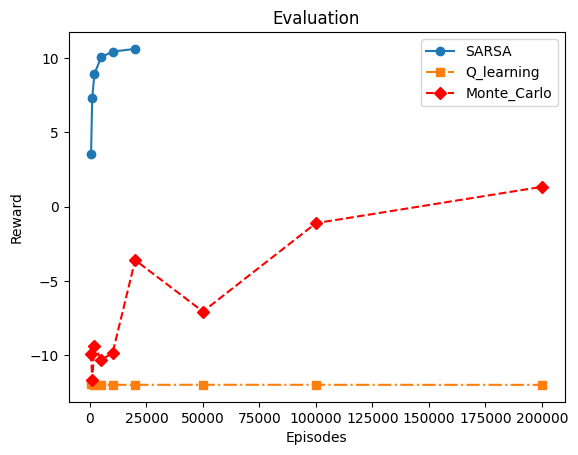

In [ ]:
plt.title("Evaluation")
plt.xlabel("Episodes")
plt.ylabel("Reward")

plt.plot(episodes_1, eva_SARSA, label="SARSA", marker = 'o')
plt.plot(episodes_2, eva_QL, label="Q_learning", ls='-.', marker='s')
plt.plot(episodes_3, eva_Monte, label="Monte_Carlo", color='r', ls='--', marker='D')
plt.legend(loc=0)

Reward over 24 step: 8.6


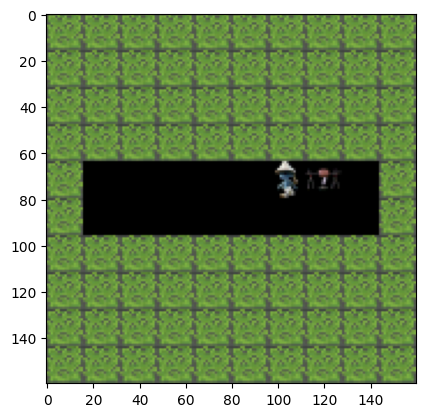

In [14]:
total_rewards = 0
num_episodes_eval = 1
display.clear_output(wait=True)
env_2.reset()
state = env_3.reset()
done = False
step = []

while not done:
    plt.imshow(env_2.render())
    action = np.argmax(q_table_SARSA[state, :]) 
    next_state, reward, done, _ = env_2.step(action)

    display.display(plt.gcf())
    display.clear_output(wait=True)
    total_rewards += reward
    state = next_state
    step.append(_)
if done:
    pass
plt.imshow(env_2.render())
display.display(plt.gcf())
display.clear_output(wait=True)

average_reward = total_rewards / num_episodes_eval
print(f"Reward over {len(step)} step: {average_reward:}")